
Homework Assignment  

Importing Libraries 

In [1]:
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
pyplot.rcParams["figure.figsize"] = [16,9]

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore')
from collections import Counter

Reading Data

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv("test.csv")

Basic Information About Data

In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variable Description
PassengerId: unique id number to each passenger
Survived: passenger survive(1) or died(0)
Pclass: passenger class
Name: name
Sex: gender of passenger
Age: age of passenger
SibSp: number of siblings/spouses
Parch: number of parents/children
Ticket: ticket number
Fare: amount of money spent on ticket
Cabin: cabin category
Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


float64(2 different): Fare ve Age
int64(5 different): Pclass, sibsp, parch, passengerId and survived
object(5 different): Cabin, embarked, ticket, name and sex

Univariate Variable Analysis

Categorical Variables: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch

Numerical Variables: Fare, age and passengerId

Plotting Categorical Variables 

In [9]:
def bar_plot(varName):
   # var = variable
    varSamples = dataset[varName]
    varValue = varSamples.value_counts()
    
    pyplot.figure(figsize = (9,3))
    pyplot.bar(varValue.index, varValue)
    
    pyplot.xticks(varValue.index, varValue.index.values)
    pyplot.ylabel("Frequency")
    pyplot.title(varName)
    pyplot.show()
    print("{}: \n {}".format(varName,varValue))


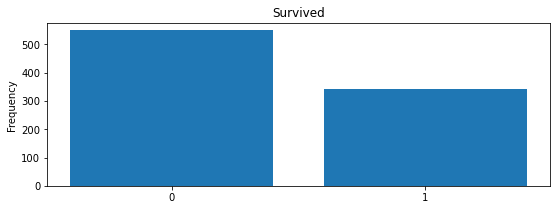

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


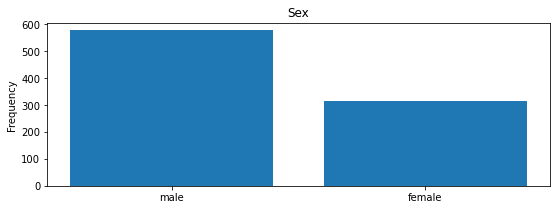

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


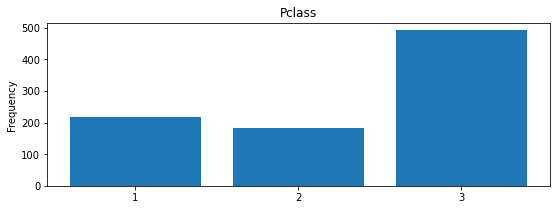

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


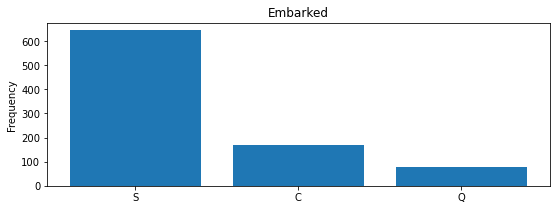

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


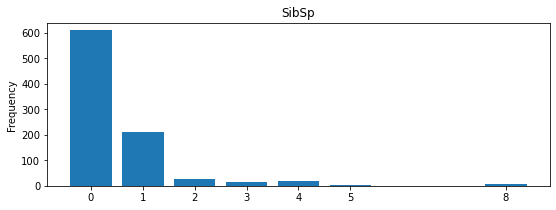

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


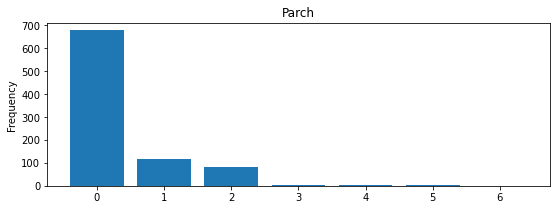

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

Plotting Numerical Variables

In [11]:
def plot_hist(varName):
    pyplot.figure(figsize = (9,3))
    pyplot.hist(dataset[varName], bins = 50)
    pyplot.xlabel(varName)
    pyplot.ylabel("Frequency")
    pyplot.title("{} distribution with hist".format(varName))
    pyplot.show()

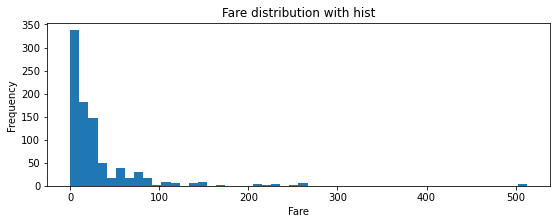

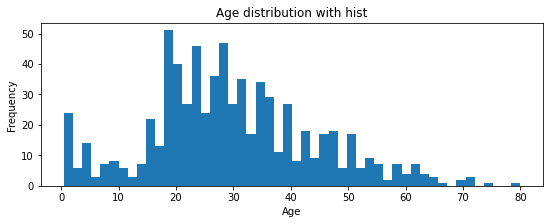

In [12]:
numericVar = ["Fare", "Age"]
for n in numericVar:
    plot_hist(n)

Data Analysis based on Survival

In [13]:
dataset[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
dataset[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
dataset[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
dataset[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Finding Outliers

In [17]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [18]:
dataset.loc[detect_outliers(dataset,["Age","SibSp","Parch","Fare"])]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Dropping Missing Values

In [19]:
dataset = dataset.drop(detect_outliers(dataset,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

Missing Value Cleaning

In [20]:
dataset_len = len(dataset)
dataset = pd.concat([dataset,test_data],axis = 0).reset_index(drop = True)

In [21]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
dataset.columns[dataset.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [24]:
dataset[dataset["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


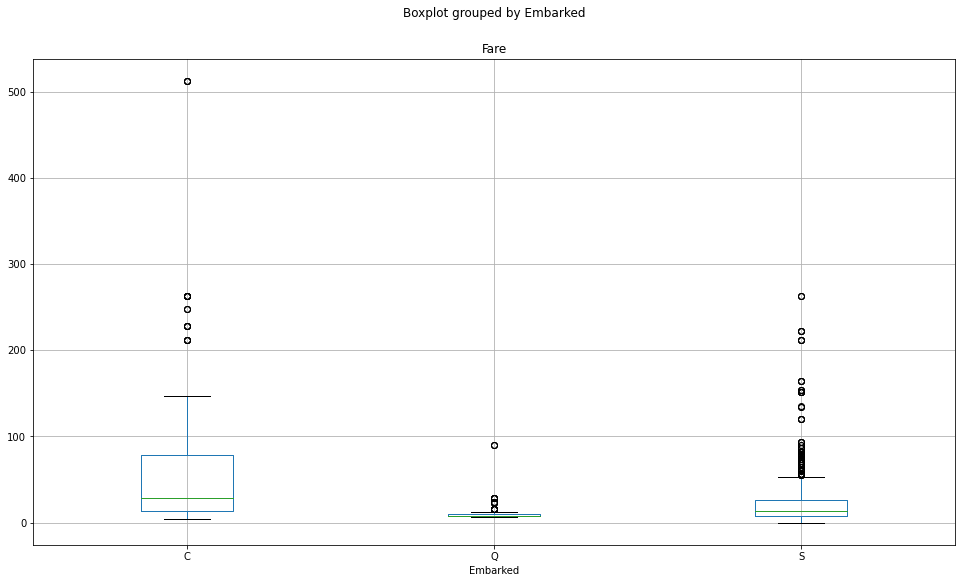

In [25]:
dataset.boxplot(column="Fare",by = "Embarked")
pyplot.show()

In [26]:
dataset["Embarked"] = dataset["Embarked"].fillna("C")
dataset["Fare"] = dataset["Fare"].fillna(np.mean(dataset[dataset["Pclass"] == 3]["Fare"]))
dataset["Age"] = dataset["Age"].fillna(np.mean(dataset['Age']))


In [27]:
dataset[dataset["Embarked"].isnull()]
dataset[dataset["Fare"].isnull()]
dataset[dataset["Age"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


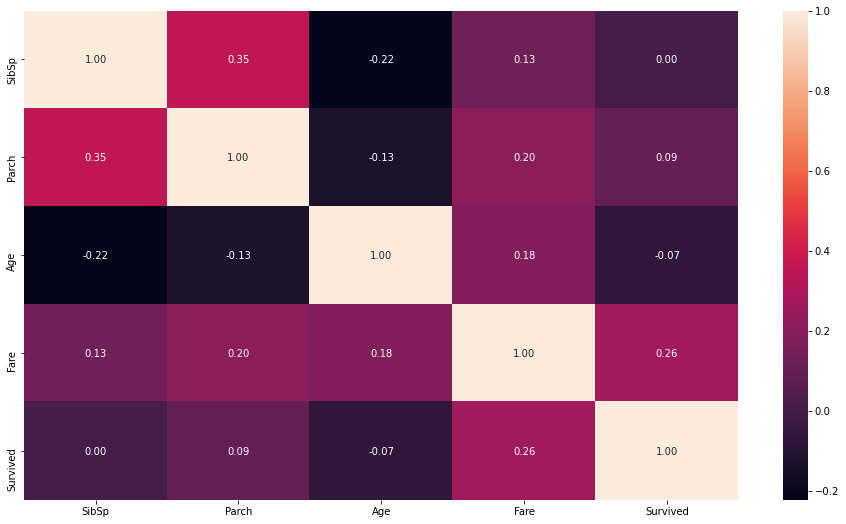

In [28]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(dataset[list1].corr(), annot = True, fmt = ".2f")
pyplot.show()

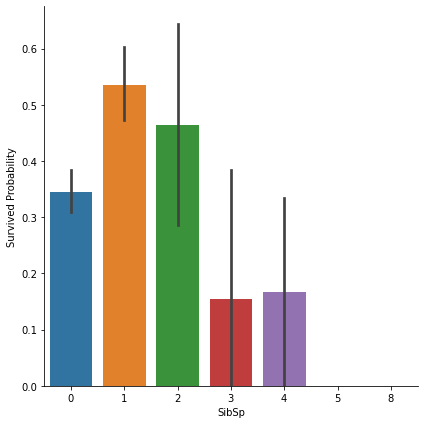

In [29]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = dataset, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
pyplot.show()

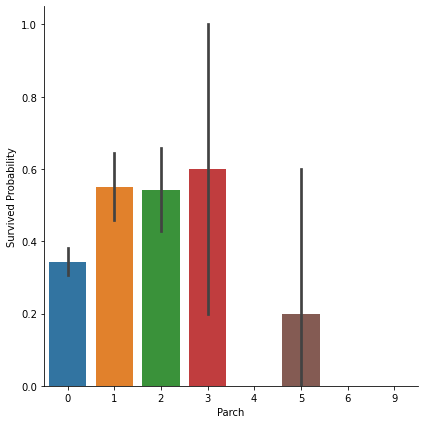

In [30]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = dataset, size = 6)
g.set_ylabels("Survived Probability")
pyplot.show()

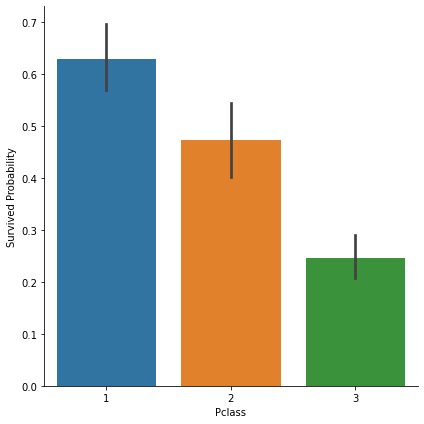

In [31]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = dataset, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
pyplot.show()

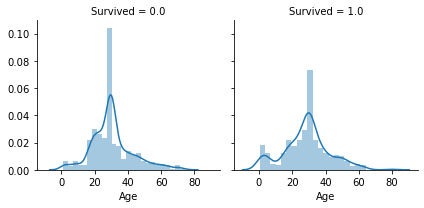

In [32]:
g = sns.FacetGrid(dataset, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
pyplot.show()

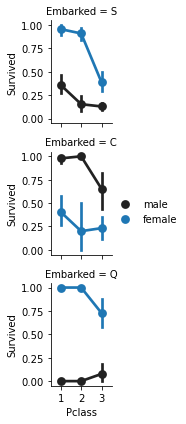

In [33]:
g = sns.FacetGrid(dataset, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
pyplot.show()

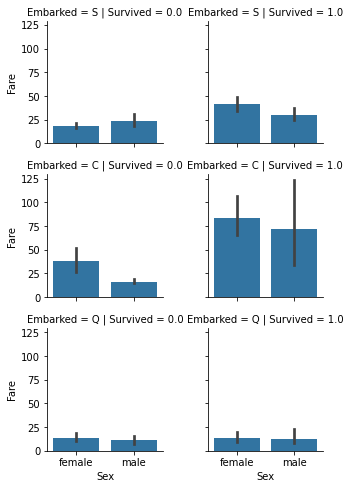

In [34]:
g = sns.FacetGrid(dataset, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
pyplot.show()

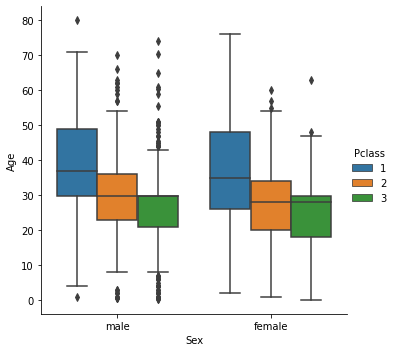

In [35]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = dataset, kind = "box")
pyplot.show()

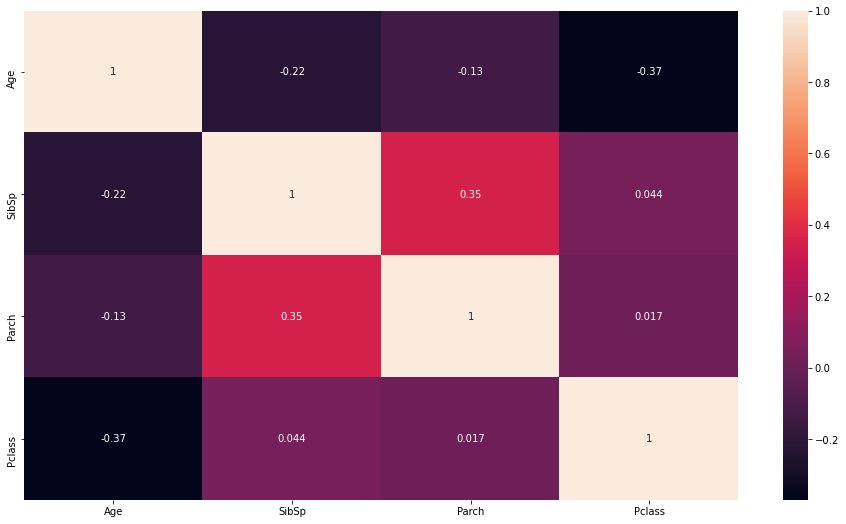

In [36]:
sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
pyplot.show()

In [37]:
dataset.corr('pearson') 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.003089,-0.041372,0.023872,-0.035835,0.019635,0.047795
Survived,-0.003089,1.000000,-0.334097,-0.070052,0.003330,0.092819,0.264613
Pclass,-0.041372,-0.334097,1.000000,-0.370289,0.044041,0.016823,-0.562354
Age,0.023872,-0.070052,-0.370289,1.000000,-0.222898,-0.130120,0.181437
SibSp,-0.035835,0.003330,0.044041,-0.222898,1.000000,0.350474,0.131954
Parch,0.019635,0.092819,0.016823,-0.130120,0.350474,1.000000,0.203056
Fare,0.047795,0.264613,-0.562354,0.181437,0.131954,0.203056,1.000000


Data Prepare For Testing

In [38]:
name = dataset["Name"]
dataset["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]


In [39]:
dataset["Title"] = dataset["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
dataset["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in dataset["Title"]]
dataset["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

In [40]:
dataset = pd.get_dummies(dataset,columns=["Title"])

In [41]:
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1
dataset["family_size"] = [1 if i < 5 else 0 for i in dataset["Fsize"]]
dataset = pd.get_dummies(dataset, columns= ["family_size"])

In [42]:
dataset = pd.get_dummies(dataset, columns=["Embarked"])


In [43]:
tickets = []
for i in list(dataset.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
dataset["Ticket"] = tickets
dataset = pd.get_dummies(dataset, columns= ["Ticket"], prefix = "T")


In [44]:
dataset = pd.get_dummies(dataset, columns= ["Pclass"])


In [45]:
dataset["Sex"] = dataset["Sex"].astype("category")
dataset = pd.get_dummies(dataset, columns=["Sex"])

In [46]:
dataset.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)


In [47]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [50]:
test = dataset[dataset_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [51]:
train = dataset[:dataset_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))


X_train 590
X_test 291
y_train 590
y_test 291
test 418


Logistic Regression

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.71
Testing Accuracy: % 82.13


In [53]:
random_state=42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [54]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.2min finished


0.8423728813559321
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8135593220338982
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s


0.7779661016949152


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s finished


Text(0.5, 1.0, 'Cross Validation Scores')

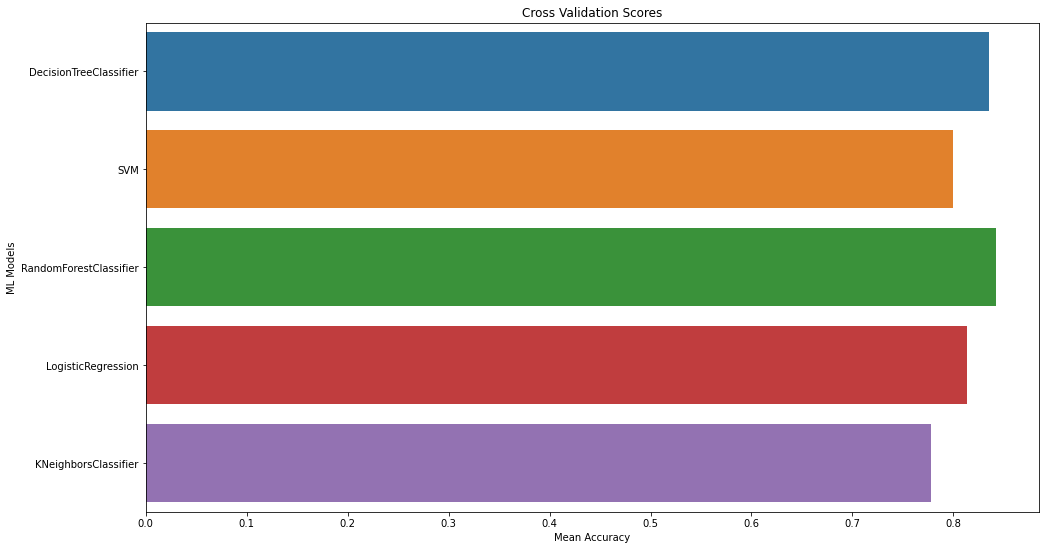

In [55]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [56]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8247422680412371
